# Analyzing Police Activity 

 In this project, I will analyse data from the [Stanford Open Policing dataset ](https://openpolicing.stanford.edu/data/). The dataset contains data for every US state; however, in this particular project, I will be focusing only on the RI (Rode Island) data.


## 1. Importing, examining, cleaning and preprocessing the dataset.

### Importing the dataset

First, I will import the dataset and have a quick first glance at it. Since I want to see all the columns, I will also change the display options.

In [301]:
import pandas as pd

pd.options.display.max_columns = 100

ri = pd.read_csv('ri_statewide_2020_04_01.csv')
ri.head()

/var/folders/j_/l3vzl03913z2sw704nqb4lfc0000gn/T/ipykernel_78340/3996749009.py:5: DtypeWarning: Columns (6,17,30) have mixed types. Specify dtype option on import or set low_memory=False.
  ri = pd.read_csv('ri_statewide_2020_04_01.csv')


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,contraband_alcohol,contraband_other,frisk_performed,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,False,citation,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,False,citation,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,False,citation,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,False,citation,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,False,citation,NaN,NaN,NaN,NaN,NaN,False,False,NaN,NaN,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


**Dealing with null values**

The first step in data cleaning is dealing with null values. 
Printing the sum of null values for each column together with the shape of the dataset allows me to quickly compare the number of null values to the total number of rows; this is helpful because I can identify the columns that have an overwhelming  majority of null values.

In [302]:
print(ri.isnull().sum())
print('\n')
print('Shape:',ri.shape)

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

I will drop the columns that have more than 400K null values and are not relevant for my future analysis, then reprint the shape of the dataset to make sure that the columns have been deleted.

In [303]:
ri.drop(columns=['raw_SearchResultOne','raw_SearchResultTwo','raw_SearchResultThree','contraband_found','contraband_weapons','contraband_alcohol','contraband_other','search_basis','reason_for_search'], axis= 1,inplace= True)

ri.shape

(509681, 22)

A part from simply removing columns, it can also be useful to remove the rows where specific columns contain missing values, especially if these columns might be relevant and contain a relatively low number of missing values. This is the case for date,time,zone,department_id,frisk_performed. I will use dropna to remove rows with null values for these columns and the print the sum of null values for each column to double check.

In [304]:
ri.dropna(subset=['date','time','zone','department_id','frisk_performed'], inplace=True)

print(ri.isnull().sum())

raw_row_number           0
date                     0
time                     0
zone                     0
subject_race         29063
subject_sex          29087
department_id            0
type                     0
arrest_made          29063
citation_issued      29063
warning_issued       29063
outcome              35831
contraband_drugs    493683
frisk_performed          0
search_conducted         0
reason_for_stop      29063
vehicle_make        191554
vehicle_model       279583
raw_BasisForStop     29063
raw_OperatorRace     29063
raw_OperatorSex      29063
raw_ResultOfStop     29063
dtype: int64


As expected the columns date,time,zone,department_id and frisk_performed don't have null values anymore. That's great news! But what about columns like subject_race, subject_sex, arrest_made, citation_issued, warning_issued, outcome, reason_for_stop? These columns are necessary for my analysis but have a higher number of null values. 

Deleting them might mean loosing some valuable data; however, they all seem to have a very similar number of missing values: does this mean that the NaN values for these columns affect the same rows? If that's the case then dropping them wouldn't be such a loss. To check if this is the case, I will drop the missing values for one column and see if this also affects the other columns.

In [305]:
ri2 = ri.dropna(subset=['subject_sex'])

ri2.isnull().sum()

raw_row_number           0
date                     0
time                     0
zone                     0
subject_race             0
subject_sex              0
department_id            0
type                     0
arrest_made              0
citation_issued          0
warning_issued           0
outcome               6763
contraband_drugs    464596
frisk_performed          0
search_conducted         0
reason_for_stop          0
vehicle_make        162525
vehicle_model       250553
raw_BasisForStop         0
raw_OperatorRace         0
raw_OperatorSex          0
raw_ResultOfStop         0
dtype: int64

The results show 0 NaNs for subject_sex, but also 0 for subject_race,arrest_made,citation_issued,warning_issued,reason_for_stop. This means  that the missing values for these columns affected the same rows that were dropped. In that case, dropping them wouldn't be a huge loss because they don't really contain much relevant information to my specific analysis needs.
I will also drop the remaining missing values for the column outcome since it's a relatively small number.

In [306]:
ri.dropna(subset=['subject_sex','subject_race','citation_issued','warning_issued','outcome','reason_for_stop'], inplace=True)

ri.isnull().sum()

raw_row_number           0
date                     0
time                     0
zone                     0
subject_race             0
subject_sex              0
department_id            0
type                     0
arrest_made              0
citation_issued          0
warning_issued           0
outcome                  0
contraband_drugs    458226
frisk_performed          0
search_conducted         0
reason_for_stop          0
vehicle_make        161088
vehicle_model       247447
raw_BasisForStop         0
raw_OperatorRace         0
raw_OperatorSex          0
raw_ResultOfStop         0
dtype: int64

**Dealing with datatypes**

Now, I will continue cleaning the data by ensuring that every column has the correct datatype. Let's print an overview of all the column datatypes.

In [307]:
ri.dtypes

raw_row_number       int64
date                object
time                object
zone                object
subject_race        object
subject_sex         object
department_id       object
type                object
arrest_made         object
citation_issued     object
warning_issued      object
outcome             object
contraband_drugs    object
frisk_performed     object
search_conducted      bool
reason_for_stop     object
vehicle_make        object
vehicle_model       object
raw_BasisForStop    object
raw_OperatorRace    object
raw_OperatorSex     object
raw_ResultOfStop    object
dtype: object

Most of the columns are python objects, however, for future calculation and analysis purposes, it is better to convert some of the features to booleans.

In [308]:
ri['frisk_performed'] = ri.frisk_performed.astype('bool')
ri['arrest_made'] = ri.arrest_made.astype('bool')
ri['citation_issued'] = ri.citation_issued.astype('bool')
ri['warning_issued'] = ri.warning_issued.astype('bool')

Now, I will combine the date and time columns in one column and then convert it to datetime object; after this, I will set the datetime column as index of the dataframe.

In [309]:
combined = ri.date.str.cat(ri.time, sep=' ')
ri['date_time'] = pd.to_datetime(combined)
ri.set_index('date_time', inplace=True)

## 2. Analysis 

**Traffic violations across all drivers**

The first question I want to answer is how many drivers commit what type of violation.

In [310]:
print(ri.reason_for_stop.value_counts())
print('\n')
print(ri.reason_for_stop.value_counts(normalize=True))


Speeding                            268203
Other Traffic Violation              89600
Equipment/Inspection Violation       58249
Registration Violation               19598
Seatbelt Violation                   16271
Special Detail/Directed Patrol       13456
Call for Service                      6288
Violation of City/Town Ordinance      1020
APB                                    445
Motorist Assist/Courtesy               365
Suspicious Person                      221
Warrant                                105
Name: reason_for_stop, dtype: int64


Speeding                            0.566043
Other Traffic Violation             0.189101
Equipment/Inspection Violation      0.122935
Registration Violation              0.041362
Seatbelt Violation                  0.034340
Special Detail/Directed Patrol      0.028399
Call for Service                    0.013271
Violation of City/Town Ordinance    0.002153
APB                                 0.000939
Motorist Assist/Courtesy            0.000

**Traffic violations across gender**

What about traffic violations across gender? Do different genders tend to commit different violations? 
Let's see

In [311]:
male_violation = ri[ri['subject_sex']=='male']
female_violation = ri[ri['subject_sex']=='female']

print('Male violations:\n{}'.format(male_violation.reason_for_stop.value_counts(normalize=True)))
print('\n')
print('Female violations:\n{}'.format(female_violation.reason_for_stop.value_counts(normalize=True)))

Male violations:
Speeding                            0.528537
Other Traffic Violation             0.208428
Equipment/Inspection Violation      0.130460
Registration Violation              0.040605
Special Detail/Directed Patrol      0.037131
Seatbelt Violation                  0.036934
Call for Service                    0.012992
Violation of City/Town Ordinance    0.002348
APB                                 0.000998
Motorist Assist/Courtesy            0.000815
Suspicious Person                   0.000514
Warrant                             0.000238
Name: reason_for_stop, dtype: float64


Female violations:
Speeding                            0.666050
Other Traffic Violation             0.137567
Equipment/Inspection Violation      0.102869
Registration Violation              0.043379
Seatbelt Violation                  0.027424
Call for Service                    0.014014
Special Detail/Directed Patrol      0.005115
Violation of City/Town Ordinance    0.001633
APB                     

Females seem to have a higher percentage for speeding; however this result doesn't mean much because it doesn't take in count the number of stops or drivers.

**Does gender affect who gets a citation vs who gets a warning?**

What happens after the driver is stopped? Does gender have an impact on whether the driver will receive a ticket or a warning? 
To answer this, I will focus only on the male and female drivers that were stopped for speeding and see one gender received more warnings than citations or viceversa.

In [312]:
male_and_speeding = ri[(ri['subject_sex']=='male') & (ri['reason_for_stop']=='Speeding')]
female_and_speeding = ri[(ri['subject_sex']=='female') & (ri['reason_for_stop']=='Speeding')]

print('Outcomes of males stopped for speeding:\n{}'.format(male_and_speeding.outcome.value_counts(normalize=True)))
print('\n')
print('Outcomes of females stopped for speeding:\n{}'.format(female_and_speeding.outcome.value_counts(normalize=True)))


Outcomes of males stopped for speeding:
citation    0.946763
warning     0.036167
arrest      0.017070
Name: outcome, dtype: float64


Outcomes of females stopped for speeding:
citation    0.954609
warning     0.039059
arrest      0.006332
Name: outcome, dtype: float64


The results don't show a big difference: around 95% of both males and females that were stopped for speeding seem to have received a citation; the same applies for warnings.

**Does gender affect whose car is searched?**



First, let's calculate the percentage of vehicle searches across all stops. The true values correspond to the cars being searched.

In [313]:
print('Percentage of search rates (True values) across all stops:\n{}'.format(ri.search_conducted.value_counts(normalize=True)))
print('\n')
print('Percentage of search rates calculating the mean of the boolean series:\n{}'.format(ri.search_conducted.mean()))

Percentage of search rates (True values) across all stops:
False    0.963423
True     0.036577
Name: search_conducted, dtype: float64


Percentage of search rates calculating the mean of the boolean series:
0.03657710401185258


Then, let's see the percentages for each gender.

In [314]:
ri.groupby('subject_sex').search_conducted.mean()

subject_sex
female    0.018556
male      0.043336
Name: search_conducted, dtype: float64

Males seem to have a higher search rate percentage. But why is that? Is it just because males are searched at a higher rate than women or because men commit different violations than women? 

In [315]:
ri.groupby(['reason_for_stop','subject_sex']).search_conducted.mean()

reason_for_stop                   subject_sex
APB                               female         0.168317
                                  male           0.270349
Call for Service                  female         0.054114
                                  male           0.106768
Equipment/Inspection Violation    female         0.040394
                                  male           0.071471
Motorist Assist/Courtesy          female         0.119048
                                  male           0.202847
Other Traffic Violation           female         0.037462
                                  male           0.058130
Registration Violation            female         0.053871
                                  male           0.101987
Seatbelt Violation                female         0.017777
                                  male           0.031429
Special Detail/Directed Patrol    female         0.018154
                                  male           0.010238
Speeding                  

For each type of violation, men have a percentage than women; violation doesn't  seem to be one of the factor that affects search rate.

My hypothesis was that search rate varies by violation type, and the difference in search rate between males and females is perhaps because they tend to commit different violations. These results disproved my hypothesis. This doesn't prove a causal link between gender and vehicles searches, but it does show a correlation.

**Does gender affect protective frisks?**

Protective frisk is when an officer pats down the driver to see if he/she has a gun. Let's count the number of protective frisks across all stops.
Since the column frisk_performed is a boolean series, I will simply calculate the mean of the column. This will return the percentage of True values which correspond to the cases when a frisk was performed.

In [316]:
ri.frisk_performed.mean()

0.019083155875320005

Let's now compare the percentage across genders.

In [317]:
ri.groupby('subject_sex')['frisk_performed'].mean()

subject_sex
female    0.008055
male      0.023219
Name: frisk_performed, dtype: float64

The results show a higher frisk rate for men. However, this frisk calculation included all stops. What about the rate at which each gender is frisked during a search? to answer this question, I will first have to subset the dataframe rows where the column search_conducted corresponds to True.

In [318]:
searched = ri[ri['search_conducted']==True]
searched.groupby('subject_sex')['frisk_performed'].mean()

subject_sex
female    0.434112
male      0.535793
Name: frisk_performed, dtype: float64

Males still have a higher percentage but results are more balanced in this case.

**Hourly Arrest Rate**

Does the arrest rate vary depending on the time of the day? First, I will calculate the arrest rate across all stops, then, I will calculate the arrest rate per hour of the day and plot it.

In [319]:
ri.arrest_made.mean()

0.03504065881419355

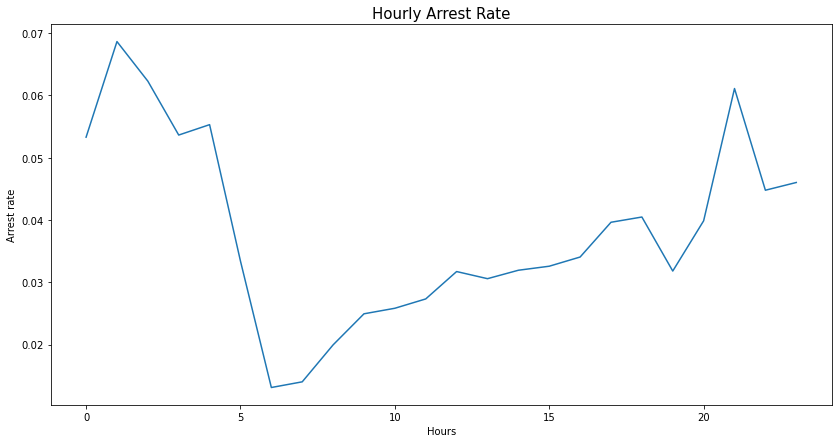

In [320]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,7)

hourly_arrest_rate = ri.groupby(ri.index.hour)['arrest_made'].mean()

hourly_arrest_rate.plot()

plt.xlabel('Hours')
plt.ylabel('Arrest rate')
plt.title('Hourly Arrest Rate', fontsize=15)

plt.show()

We can notice a significant spike at nightime (especially between 1 and 2 AM) and then a significant decrease in the early morning (at around 5 AM). Arrests seem to be more frequent during night time.

**Do drugs-related stops increase over time?**

To answer this question, I will first calculate the annual drug-related stops rate, then plot it to see how it changes over time.

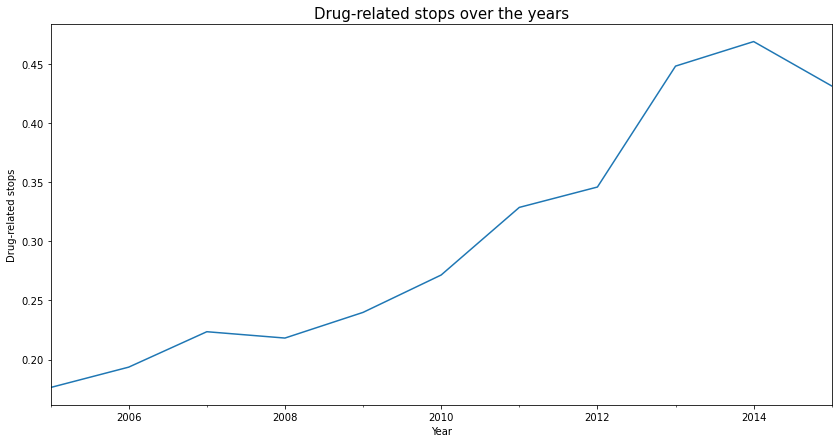

In [321]:
annual_drug_rate = ri.contraband_drugs.resample('A').mean()

annual_drug_rate.plot()

plt.xlabel('Year')
plt.ylabel('Drug-related stops')
plt.title('Drug-related stops over the years', fontsize=15)

plt.show()

The trend seems to show a significant increase over time: according to this data, the rate has more than doubled from 2006 to 2014. 
But why is this the case? Is this increase correlated with an increase in the search rate? 
Let's see

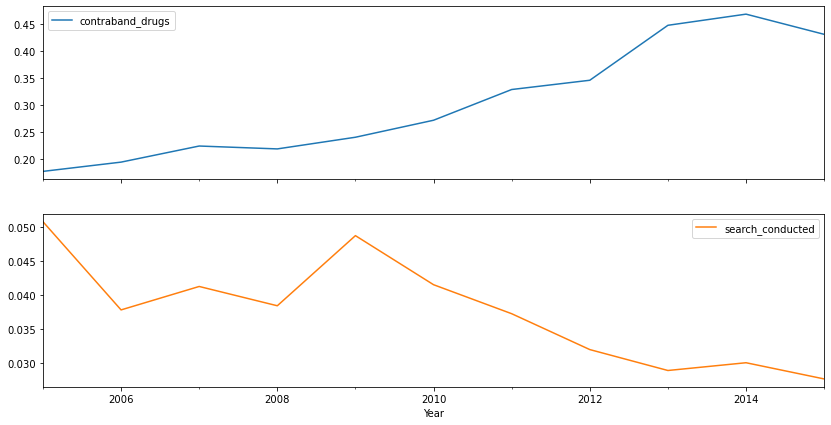

In [322]:
annual_search_rate = ri.search_conducted.resample('A').mean()

annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

annual.plot(subplots=True)

plt.xlabel('Year')

plt.show()

This disproves my hypothesis that the increase of drug-related searches through the last 15 years might be directly proportional to the increase of the search rate. Starting from 2010, the search rate significantly decreases while the drug rate continues to increase!

**Violations by District**

The state of Rhode Island is broken into six police districts, also known as zones. How do the zones compare in terms of what violations are caught by police? To answer this,I will create a frequency table to determine how many violations of each type took place in each of the six zones. Since I only want to analyze the K zones, I will subset the rows corresponding to these values. After this, I will display the results in a bar plot.

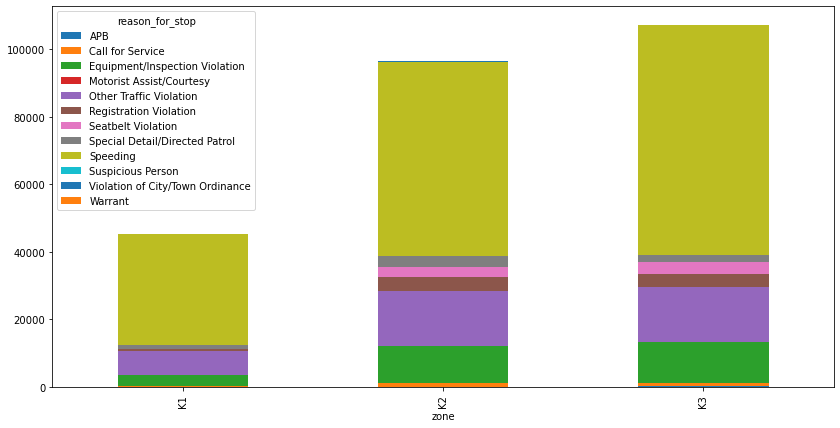

In [323]:
violations_per_zone = pd.crosstab(ri.zone,ri.reason_for_stop)

k_zones = violations_per_zone.loc['K1':'K3']

k_zones.plot(kind='bar',stacked=True)

plt.show()

Across all three zones, the majority of the stops are for speeding. However, another interesting thing is that the violation proportions are very similar between zones K2 and K3.

**Impact of weather conditions on police activity**

In the next sections of the project, I will try to see if there might be some correlation between weather conditions and police activity. In order to do this, I will import data collected from the [National Centers for Environmental Information]('https://www.ncei.noaa.gov/access'). My hypothesis is that weather conditions impact police behavior during traffic stops, so ideally I would look up the historical weather at the location of each stop. However, the traffic stops dataset does not specify stop location, so I am going to use the data from a single weather station near the center of Rhode Island. This is not ideal, but Rhode Island is the smallest US state and so a single station will still give us a general idea of the weather throughout the state.

In [324]:
weather = pd.read_csv('weather.csv')

weather.head()

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00014765,2005-01-04,42.0,39,45,6.93,16.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00014765,2005-01-05,36.0,28,43,7.83,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


As a 'data sanity check', I will use the describe method (which computes useful statistics) and visualize the distribution of data points using a boxplot. This a quick way to understand if the data is reasonable and to see if there might be some discrepancies such as extreme outliers or values out of scale.
My analysis will be focused on the temperature columns.

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


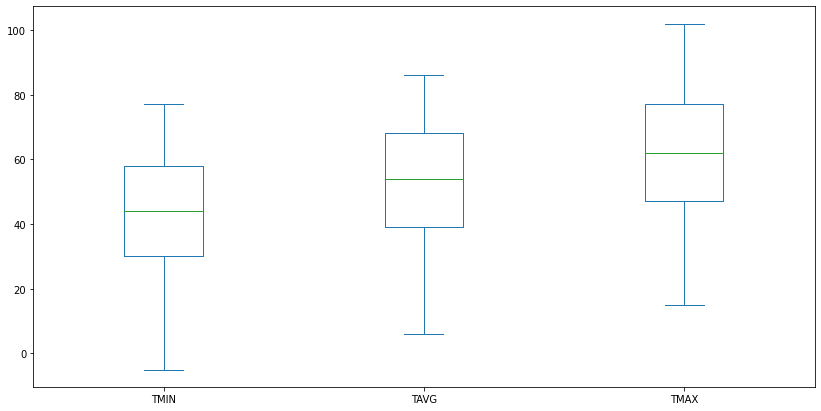

In [325]:
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

weather[['TMIN','TAVG','TMAX']].plot(kind='box')

plt.show()

The temperature data looks good so far: the TAVG values are in between TMIN and TMAX, and the measurements and ranges seem reasonable.

Now I will continue to assess whether the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


<AxesSubplot:ylabel='Frequency'>

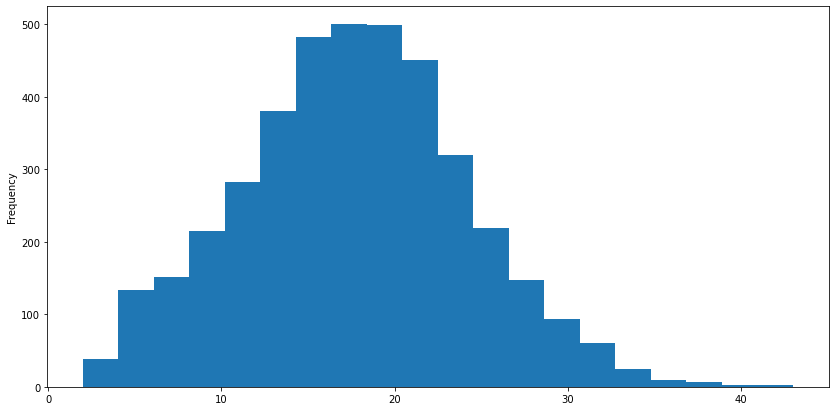

In [326]:
weather['TDIFF'] = weather.TMAX - weather.TMIN

print(weather['TDIFF'].describe())

weather['TDIFF'].plot(kind='hist', bins=20)

The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

**Categorizing the weather**

In the following script, I will work with the columns starting with 'WT', which refer to different bad weather conditions (hail, rain, snow etc). These columns show the value of 1 in case of bad weather and null in the opposite case.
I want to :
1. Create a new dataframe WT that only contains the bad weather columns.
2. Create a new column 'bad_conditions' that sums across rows in WT in order to know the total number of bad weather conditions per day (each row is a day).
3. Create a new column 'ratings' that maps the counts of bad weather conditions to a rating system. (0 equals to 'good', 1-4 equals to 'bad', 5-9 equals to 'worse').
4. Convert the 'rating' column to a category datatype.

All these steps allow me to categorize bad weather conditions: in other words, the number of bad weather conditions per day have been mapped to the strings 'good','bad','worse'. This will help in my analysis because a category datatype uses less memory and makes calculations easier.










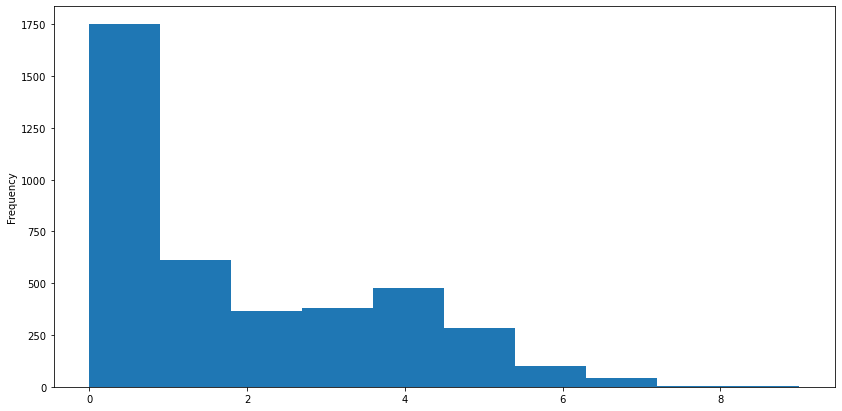

In [328]:
WT = weather.loc[:, 'WT01':'WT22']

weather['bad_conditions'] = WT.sum(axis='columns')

weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

weather.bad_conditions.plot(kind='hist')

plt.show()

The histogram shows that the majority of days had good weather (0 bad weather conditions), a smaller number of days had between 1 and 4 bad weather conditions and  an even smaller percentage had more than 4 bad weather conditions. By looking at this graph, it seems like a reasonable choice to create the categories 'good' (0 bad conditions), 'bad' (1 to 4 bad conditions) and 'terrible' (more than 4).

In [329]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'terrible', 6:'terrible', 7:'terrible', 8:'terrible', 9:'terrible'}

weather['ratings'] = weather.bad_conditions.map(mapping)

weather.ratings.value_counts()

bad         1836
good        1749
terrible     432
Name: ratings, dtype: int64

Now, the last thing to do is to convert the ratings column to a category datatype.

In [330]:
cats = pd.CategoricalDtype(['good', 'bad', 'terrible'], ordered=True)

weather['ratings'] = weather.ratings.astype(cats)

weather.ratings.head()

0    bad
1    bad
2    bad
3    bad
4    bad
Name: ratings, dtype: category
Categories (3, object): ['good' < 'bad' < 'terrible']

**Merging the stops and weather datasets**

Since the final purpose is to analyze possible correlations between weather conditions and police stops, the next step will be to merge both datasets into one. Before doing this, a couple things need to be done:
- resetting the index of both dataframes since they will go lost during the merge.
- creating a new dataframe from the weather dataset that only contains my columns of interest
- making the sure the columns the dataframes will be joined on have the same datatype. In this case, I will join on the date columns, so both need to be a datetime object.

In [331]:
ri.reset_index(inplace=True)

weather_rating = weather[['DATE', 'ratings']]



print(weather_rating.head())

ri.head()

         DATE ratings
0  2005-01-01     bad
1  2005-01-02     bad
2  2005-01-03     bad
3  2005-01-04     bad
4  2005-01-05     bad


,date_time,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,warning_issued,outcome,contraband_drugs,frisk_performed,search_conducted,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop
0,2005-11-22 11:15:00,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,False,citation,NaN,False,False,Speeding,NaN,NaN,SP,W,M,M
1,2005-10-01 12:20:00,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,False,citation,NaN,False,False,Speeding,NaN,NaN,SP,W,M,M
2,2005-10-01 12:30:00,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,False,citation,NaN,False,False,Speeding,NaN,NaN,SP,W,F,M
3,2005-10-01 12:50:00,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,False,citation,NaN,False,False,Speeding,NaN,NaN,SP,W,M,M
4,2005-10-01 13:10:00,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,False,citation,NaN,False,False,Speeding,NaN,NaN,SP,W,F,M


In [397]:
ri.loc[:,'date']= pd.to_datetime(ri.date)

weather_rating.loc[:,'DATE'] = pd.to_datetime(weather_rating.DATE)



/var/folders/j_/l3vzl03913z2sw704nqb4lfc0000gn/T/ipykernel_78340/920722980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_rating.loc[:,'DATE'] = pd.to_datetime(weather_rating.DATE)


In [399]:
ri_weather = pd.merge(left= ri, right=weather_rating,left_on = 'date', right_on = 'DATE', how='left')

ri_weather.shape

(473821, 25)

Now that I joined the two datasets, I will reset the index to the date_time column

In [400]:
ri_weather.set_index('date_time', inplace= True)

**Does weather affect arrest rates?**

Do police officers arrest drivers more often when the weather is bad? Let's find out!

- First, I'll calculate the overall arrest rate.
- Then, I'll calculate the arrest rate for each of the weather ratings I previously assigned.
- Finally, I'll add violation type as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

In [401]:
print('Overall arrest rate:\n\n{}'.format(ri_weather.arrest_made.mean()))

print('\n')
      
print('Arrest rate by weather condition:\n\n{}'.format(ri_weather.groupby('ratings').arrest_made.mean()))

Overall arrest rate:

0.03504065881419355


Arrest rate by weather condition:

ratings
good        0.033468
bad         0.035692
terrible    0.040023
Name: arrest_made, dtype: float64


The arrest rate does seem to increase proportionally to the bad weather. Let's now plot a pivot to visualize the arrest rate in correlation to weather conditions and violations.

In [402]:
ri_weather.pivot_table(index='reason_for_stop', columns='ratings', values='arrest_made')

ratings,good,bad,terrible
reason_for_stop,,,
APB,0.256757,0.318681,0.390244
Call for Service,0.213403,0.222861,0.225758
Equipment/Inspection Violation,0.059287,0.062757,0.100847
Motorist Assist/Courtesy,0.314465,0.269006,0.228571
Other Traffic Violation,0.056029,0.058363,0.062690
Registration Violation,0.077795,0.093771,0.099883
Seatbelt Violation,0.025593,0.028926,0.000000
Special Detail/Directed Patrol,0.009594,0.009726,0.004829
Speeding,0.013240,0.013395,0.016635


The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!